In [2]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving original.csv to original.csv


In [5]:
import pandas as pd  #bir şirketin yaptığı reklam harcamaları sonucunda satışların sonuçları verilmştir bağımlı değişken satışlar, bağımsız diğerleri
df=pd.read_csv("./original.csv")
df=df.iloc[:,1:len(df)] #index problemi olduğu için seçim işlemini yapar
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


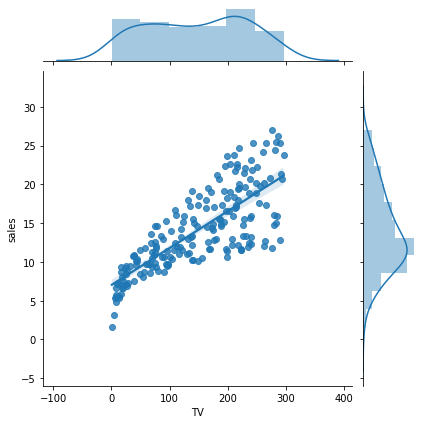

In [8]:
import seaborn as sns
sns.jointplot(x="TV", y="sales", data=df, kind="reg"); #görselleştirme 

In [10]:
from sklearn.linear_model import LinearRegression
X=df[["TV"]] #bağımsız değişken
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [13]:
Y=df[["sales"]]
Y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [14]:
reg=LinearRegression()  #model nesnesi oluşturma işlemi, örenkleme işlemi

model=reg.fit(X,Y) #bu modeli fit et, yani kur
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
dir(model) #nesnenin içerisinden alınabilecek olan bilgileri verr

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [17]:
model.intercept_ #sabit beta0 değeri

array([7.03259355])

In [0]:
model.coef_ #beta1 katsayısı

In [19]:
#rkare(bağımlı değişkendeki değişikliğin bağımsız değişkenlerce açıklanma yüzdesidir.)
model.score(X,Y)

0.611875050850071

# **Tahmin**

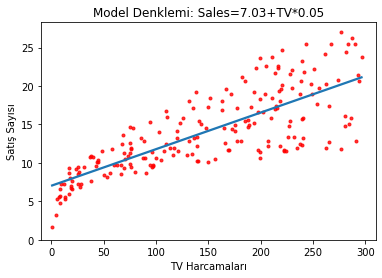

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
g=sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9}) #ci=None güven aralığı koymama
g.set_title("Model Denklemi: Sales=7.03+TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [21]:
model.predict([[165]]) #tahmin edilmesi istenen değer

array([[14.87613922]])

In [23]:
yeni_veri=[[5],[15],[30]]  #birden fazla tahmin yapılması 
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

# **Artıklar**

*MSE*=Hata Kareler Ortalaması

*RMSE*=Hata Kareler Ortalamasının Karekökü

In [24]:
Y.head() #gerçek değerler

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [25]:
model.predict(X)[0:6] #tahmin edilen değerler

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [0]:
gercek_y=Y[0:10]

In [0]:
tahmin_edilen_y=pd.DataFrame(model.predict(X)[0:10])

In [33]:
hatalar=pd.concat([gercek_y,tahmin_edilen_y], axis=1)
hatalar.columns=["Gerçek Y","Tahmim Edilen Y"]
hatalar

,Gerçek Y,Tahmim Edilen Y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [34]:
hatalar["hata"]=hatalar["Gerçek Y"]-hatalar["Tahmim Edilen Y"]
hatalar

,Gerçek Y,Tahmim Edilen Y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [36]:
hatalar["hata_kareler"]=hatalar["hata"]**2
hatalar

,Gerçek Y,Tahmim Edilen Y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [38]:
import numpy as np
np.mean(hatalar["hata_kareler"])  #ortalama hate değerini verir. Buna göre bizim modelimi şu kadar başarılı vs.

9.290350329638102